# **Trabalho Aplicação Fuzzy**
**Discentes:**
- **Caroline Souza**
- **Thays Soares**

**Disciplina:** Inteligência Artificial

---

### **Sistema de Diagnótico Médico**

Primeiro, instale a biblioteca skfuzzy:

In [ ]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 32.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=e94ca902c757bad2bb695bc72b75568e32899d7c642d7beab2a7bb99d299842a
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Em seguida, importe as bibliotecas necessárias:

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

#### **Variáveis de entrada e saída fuzzy:**

In [ ]:
# Variáveis de entrada
febre = ctrl.Antecedent(np.arange(30, 41, 1), 'febre')
tosse = ctrl.Antecedent(np.arange(0, 11, 1), 'tosse')
dor_peito = ctrl.Antecedent(np.arange(0, 11, 1), 'dor_peito')

# Variável de saída
diagnostico = ctrl.Consequent(np.arange(0, 101, 1), 'diagnostico', defuzzify_method='centroid')

#### **Definindo Funções de Pertinência**

In [ ]:
# Funções de pertinência para febre
febre['baixa'] = fuzz.trimf(febre.universe, [0, 0, 37])
febre['moderada'] = fuzz.trimf(febre.universe, [37, 37.5, 39])
febre['alta'] = fuzz.trimf(febre.universe, [38, 40, 40])

# Funções de pertinência para tosse
tosse['leve'] = fuzz.trimf(tosse.universe, [0, 0, 4])
tosse['moderada'] = fuzz.trimf(tosse.universe, [4, 5, 7])
tosse['intensa'] = fuzz.trimf(tosse.universe, [6, 10, 10])

# Funções de pertinência para dor no peito
dor_peito['leve'] = fuzz.trimf(dor_peito.universe, [0, 0, 5])
dor_peito['moderada'] = fuzz.trimf(dor_peito.universe, [4, 5, 7])
dor_peito['intensa'] = fuzz.trimf(dor_peito.universe, [6, 10, 10])

# Funções de pertinência para diagnóstico
diagnostico['saudavel'] = fuzz.trapmf(diagnostico.universe, [0, 0, 10, 30])
diagnostico['gripe'] = fuzz.trapmf(diagnostico.universe, [20, 40, 60, 80])
diagnostico['pneumonia'] = fuzz.trapmf(diagnostico.universe, [70, 85, 100, 100])
diagnostico['infarto'] = fuzz.trapmf(diagnostico.universe, [90, 95, 100, 100])

#### **Definindo Regras Fuzzy**

In [ ]:
# Regras fuzzy
regra1 = ctrl.Rule(febre['alta'] & tosse['moderada'], diagnostico['pneumonia'])
regra2 = ctrl.Rule(febre['moderada'] & tosse['leve'], diagnostico['gripe'])
regra3 = ctrl.Rule(febre['baixa'] & tosse['leve'], diagnostico['saudavel'])
regra4 = ctrl.Rule(febre['alta'] & tosse['leve'], diagnostico['gripe'])
regra5 = ctrl.Rule(febre['alta'] & tosse['intensa'],diagnostico['pneumonia'])
regra6 = ctrl.Rule(febre['moderada'] & tosse['moderada'],diagnostico['gripe'])
regra7 = ctrl.Rule(febre['moderada'] & tosse ['intensa'],diagnostico['pneumonia'])
regra8 = ctrl.Rule(febre['baixa'] & tosse ['moderada'], diagnostico['gripe'])
regra9 = ctrl.Rule(febre['baixa'] & tosse['intensa'],diagnostico['gripe'])
regra10 = ctrl.Rule(febre['alta'] & tosse['moderada'] & dor_peito['intensa'], diagnostico['pneumonia'])
regra11 = ctrl.Rule(febre['moderada'] & tosse['leve'] & dor_peito['leve'], diagnostico['gripe'])
regra12 = ctrl.Rule(febre['alta'] & tosse['intensa'] & dor_peito['intensa'], diagnostico['infarto'])


#### **Sistemas de Controle**

In [ ]:
# Sistema de controle fuzzy
diagnosis_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra12])
diagnosis = ctrl.ControlSystemSimulation(diagnosis_ctrl)

# Entrada dos dados = Altere para um valor que ative as regras
diagnosis.input['febre'] =
diagnosis.input['tosse'] = 0
diagnosis.input['dor_peito'] = 0

# Computando o resultado
diagnosis.compute()

# Saída do diagnóstico
print('O diagnóstico do paciente:', diagnosis.output['diagnostico'])

O diagnóstico do paciente: 14.075277200277197


In [ ]:
# Sistema de controle fuzzy
diagnosis_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra12])
diagnosis = ctrl.ControlSystemSimulation(diagnosis_ctrl)

# Entrada dos dados = Altere para um valor que ative as regras
diagnosis.input['febre'] = 36
diagnosis.input['tosse'] = 5
diagnosis.input['dor_peito'] = 5

# Computando o resultado
diagnosis.compute()

# Saída do diagnóstico
resultado_diagnostico = diagnosis.output['diagnostico']
print(f'O valor do diagnóstico do paciente é: {resultado_diagnostico:.2f}')

# Interpretando o diagnóstico
if resultado_diagnostico < 60:
    interpretacao = 'O paciente está saudável!'
elif 60 <= resultado_diagnostico < 80:
    interpretacao = 'O paciente está gripado!'
else:
    interpretacao = 'O paciente está com pneumonia!'

print(interpretacao)

O valor do diagnóstico do paciente é: 50.00
O paciente está saudável!


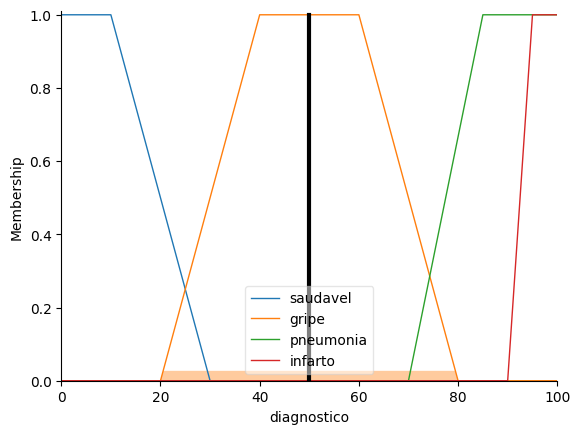

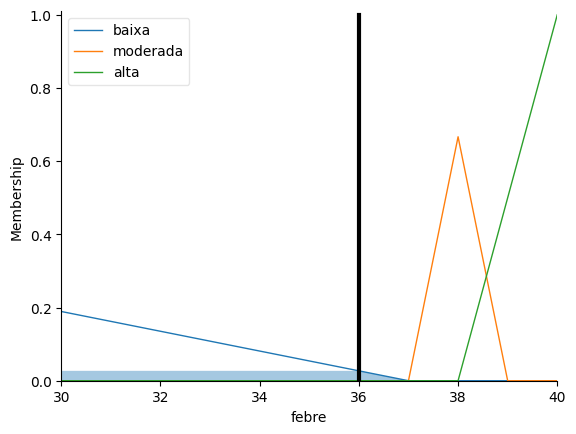

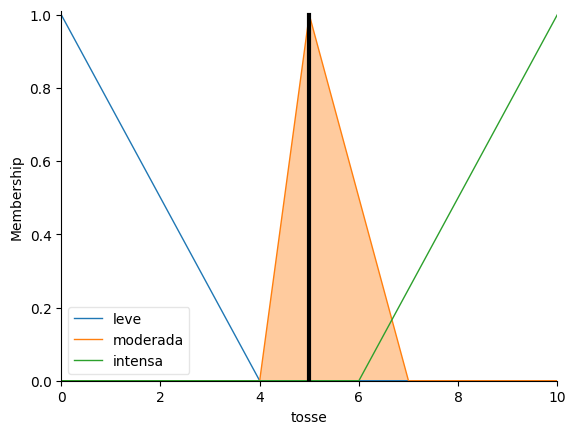

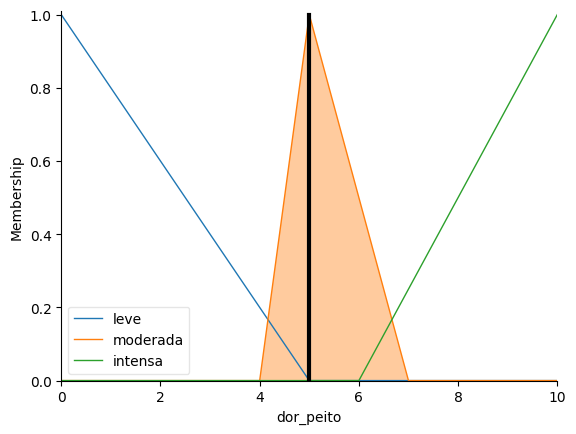

In [ ]:
#Plotando o grafico de diagnostico
diagnostico.view(diagnosis)
febre.view(diagnosis)
tosse.view(diagnosis)
dor_peito.view(diagnosis)